# Capstone Project - The Battle of the Neighborhoods

## Import Libraries

In [87]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import re

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Foursquare Data

In [72]:

#CLIENT_ID = '' # your Foursquare ID
#CLIENT_SECRET = '' # your Foursquare Secret

#VERSION = '20180604'
#LIMIT = 30

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: XSLPNWWA0WBALTH2KD50LH4FZMDAP03CMN3AJLTAKX13G4GO
CLIENT_SECRET:MVTCFRSYI5AUFWDGTJDIJQBKZVWQFV3MCHCVM2RVB3QHE1F3


In [88]:
df = pd.read_csv("dataset_TSMC2014_TKY.csv")

In [89]:
df.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012


In [90]:
df.venueCategory.unique().shape


(247,)

In [91]:
df_ind=df[df['venueCategory'].str.contains("india",flags=re.IGNORECASE, regex=True)]

In [92]:
df_ind

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
1077,61,4e167b47483b3ee57cde7cb1,4bf58dd8d48988d10f941735,Indian Restaurant,35.585347,139.725556,540,Wed Apr 04 03:04:31 +0000 2012
1226,577,4b6cdfa0f964a520c45a2ce3,4bf58dd8d48988d10f941735,Indian Restaurant,35.668827,139.651013,540,Wed Apr 04 03:35:09 +0000 2012
1302,2027,4bd113bfcaff95212c3cd0f0,4bf58dd8d48988d10f941735,Indian Restaurant,35.673047,139.795044,540,Wed Apr 04 03:49:23 +0000 2012
1381,160,4c207c17920076b0e543c6e9,4bf58dd8d48988d10f941735,Indian Restaurant,35.632160,139.712407,540,Wed Apr 04 04:05:47 +0000 2012
1451,756,4c15a49082a3c9b6ed38fff8,4bf58dd8d48988d10f941735,Indian Restaurant,35.697391,139.759654,540,Wed Apr 04 04:19:45 +0000 2012
...,...,...,...,...,...,...,...,...
573098,255,4b738418f964a5202cb22de3,4bf58dd8d48988d10f941735,Indian Restaurant,35.700225,139.774401,540,Thu Feb 14 10:14:25 +0000 2013
573101,473,4b738418f964a5202cb22de3,4bf58dd8d48988d10f941735,Indian Restaurant,35.700225,139.774401,540,Thu Feb 14 10:14:35 +0000 2013
573196,1352,50fa90e1e4b0ba413b561131,4bf58dd8d48988d10f941735,Indian Restaurant,35.645962,139.669761,540,Thu Feb 14 10:36:54 +0000 2013
573208,779,4b57ca50f964a520524128e3,4bf58dd8d48988d10f941735,Indian Restaurant,35.713826,139.704385,540,Thu Feb 14 10:39:23 +0000 2013


In [30]:
#df_ind.venueId.unique()

In [93]:
#df_ind.venueId.unique().shape()
df_ind.venueId.nunique(dropna = True)

705

In [94]:
len(df_ind)

2639

In [95]:
df_ind.drop_duplicates(subset="venueId",keep = False, inplace = True)

C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_ind

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
1226,577,4b6cdfa0f964a520c45a2ce3,4bf58dd8d48988d10f941735,Indian Restaurant,35.668827,139.651013,540,Wed Apr 04 03:35:09 +0000 2012
4643,2151,4f407b37e4b0085fed87706f,4bf58dd8d48988d10f941735,Indian Restaurant,35.715560,139.672422,540,Thu Apr 05 08:25:21 +0000 2012
5257,1963,4f3490a3e4b0993aec906d11,4bf58dd8d48988d10f941735,Indian Restaurant,35.777019,139.723455,540,Thu Apr 05 10:11:38 +0000 2012
5432,1474,4bee6b7fd355a5936cde0a60,4bf58dd8d48988d10f941735,Indian Restaurant,35.697160,139.785450,540,Thu Apr 05 10:53:03 +0000 2012
5576,245,4b9b0ec1f964a52069ef35e3,4bf58dd8d48988d10f941735,Indian Restaurant,35.653552,139.542270,540,Thu Apr 05 11:47:45 +0000 2012
...,...,...,...,...,...,...,...,...
564195,855,5023361ce4b0e522d483ab91,4bf58dd8d48988d10f941735,Indian Restaurant,35.674428,139.793740,540,Mon Feb 11 03:34:04 +0000 2013
564395,54,4bad9d28f964a5200f5f3be3,4bf58dd8d48988d10f941735,Indian Restaurant,35.707111,139.666830,540,Mon Feb 11 04:50:50 +0000 2013
564635,277,51188b7de4b0261e059a3fe5,4bf58dd8d48988d10f941735,Indian Restaurant,35.711858,139.810148,540,Mon Feb 11 06:11:28 +0000 2013
565655,921,4d4d08c49ee1a35df25621df,4bf58dd8d48988d10f941735,Indian Restaurant,35.653583,139.547428,540,Mon Feb 11 10:26:00 +0000 2013


In [97]:
df_ind=df_ind.reset_index()
df_ind

,index,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1226,577,4b6cdfa0f964a520c45a2ce3,4bf58dd8d48988d10f941735,Indian Restaurant,35.668827,139.651013,540,Wed Apr 04 03:35:09 +0000 2012
1,4643,2151,4f407b37e4b0085fed87706f,4bf58dd8d48988d10f941735,Indian Restaurant,35.715560,139.672422,540,Thu Apr 05 08:25:21 +0000 2012
2,5257,1963,4f3490a3e4b0993aec906d11,4bf58dd8d48988d10f941735,Indian Restaurant,35.777019,139.723455,540,Thu Apr 05 10:11:38 +0000 2012
3,5432,1474,4bee6b7fd355a5936cde0a60,4bf58dd8d48988d10f941735,Indian Restaurant,35.697160,139.785450,540,Thu Apr 05 10:53:03 +0000 2012
4,5576,245,4b9b0ec1f964a52069ef35e3,4bf58dd8d48988d10f941735,Indian Restaurant,35.653552,139.542270,540,Thu Apr 05 11:47:45 +0000 2012
...,...,...,...,...,...,...,...,...,...
260,564195,855,5023361ce4b0e522d483ab91,4bf58dd8d48988d10f941735,Indian Restaurant,35.674428,139.793740,540,Mon Feb 11 03:34:04 +0000 2013
261,564395,54,4bad9d28f964a5200f5f3be3,4bf58dd8d48988d10f941735,Indian Restaurant,35.707111,139.666830,540,Mon Feb 11 04:50:50 +0000 2013
262,564635,277,51188b7de4b0261e059a3fe5,4bf58dd8d48988d10f941735,Indian Restaurant,35.711858,139.810148,540,Mon Feb 11 06:11:28 +0000 2013
263,565655,921,4d4d08c49ee1a35df25621df,4bf58dd8d48988d10f941735,Indian Restaurant,35.653583,139.547428,540,Mon Feb 11 10:26:00 +0000 2013


In [19]:
"""
#print(neighborhood_latitude, neighborhood_longitude)

neighborhood_latitude = df_ind.loc[1226, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_ind.loc[1226, 'longitude'] # neighborhood longitude value

venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=13) 


folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup=neighborhood_latitude,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)
"""
"""
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_ind.latitude, df_ind.longitude, df_ind.venueCategory):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
"""
"""
# Modified code to show ll values
for lat, lng, label in zip(df_ind.latitude, df_ind.longitude, df_ind.venueCategory):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=[lat,lng],
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map
"""

"\n# Modified code to show ll values\nfor lat, lng, label in zip(df_ind.latitude, df_ind.longitude, df_ind.venueCategory):\n    folium.CircleMarker(\n        [lat, lng],\n        radius=5,\n        color='blue',\n        popup=[lat,lng],\n        fill = True,\n        fill_color='blue',\n        fill_opacity=0.6\n    ).add_to(venues_map)\n# display map\nvenues_map\n"

In [98]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [76]:
"""
#https://api.foursquare.com/v2/venues/VENUE_ID
from pandas.io.json import json_normalize
appended_data1=pd.DataFrame()
#print(appended_data1)

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'

a=len(df_ind)

#for i in range(a):
for i in range(a):
    #print(df_ind.venueId[i])
    VenueId=df_ind.venueId[i]
    #uncomment to run the query
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VenueId,CLIENT_ID, CLIENT_SECRET,VERSION)
    
    url

    results = requests.get(url).json()
    #print(results)
    #venues = results['response']['groups'][0]['items']
    venues = results['response']['venue']

    #venues = results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    
    ## filter columns
    filtered_columns = ['name', 'categories', 'location.lat', 'location.lng', 'verified', 'dislike', 'rating', 'stats.tipCount', 'price.tier', 'price.message', 'likes.count', 'likes.groups', 'beenHere.count']
    nearby_venues =nearby_venues.loc[:, filtered_columns]
    # filter the category for each row
    nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #print(nearby_venues)
    appended_data1=appended_data1.append(nearby_venues)
    

print(appended_data1)
"""

                                name                 categories        lat  \
0                             コーヒヌール          Indian Restaurant  35.668740   
0            CHAMI'S CURRY (チャミスカレー)  Japanese Curry Restaurant  35.715756   
0          Sitaara Diner (シターラ・ダイナー)          Indian Restaurant  35.777623   
0                       Stone (ストーン)         Yoshoku Restaurant  35.697209   
0                インド・ネパール料理 Raja 調布店          Indian Restaurant  35.653634   
..                               ...                        ...        ...   
0                               ダルハラ          Indian Restaurant  35.674670   
0              Deep Jyoti (ディープジョティ)          Indian Restaurant  35.707202   
0                     華麗なるカレー 業平橋総本店          Indian Restaurant  35.711675   
0                           牛たん処 い志井        Japanese Restaurant  35.653563   
0   Restaurent & Pub SANGRIA (サングリア)          Indian Restaurant  35.680105   

           lng  verified  dislike  rating  tipCount  tier   mes

In [77]:
CLIENT_ID

'R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K'

In [78]:
nearby_venues1 = json_normalize(venues)
nearby_venues1.columns

Index(['id', 'name', 'canonicalUrl', 'categories', 'verified', 'dislike', 'ok',
       'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit',
       'createdAt', 'shortUrl', 'timeZone', 'hierarchy', 'contact.phone',
       'contact.formattedPhone', 'contact.facebook',
       'contact.facebookUsername', 'contact.facebookName', 'location.address',
       'location.crossStreet', 'location.lat', 'location.lng',
       'location.labeledLatLngs', 'location.cc', 'location.city',
       'location.state', 'location.country', 'location.formattedAddress',
       'stats.tipCount', 'price.tier', 'price.message', 'price.currency',
       'likes.count', 'likes.groups', 'likes.summary', 'beenHere.count',
       'beenHere.unconfirmedCount', 'beenHere.marked',
       'beenHere.lastCheckinExpiredAt', 'specials.count', 'specials.items',
       'photos.count', 'photos.groups', 'reasons.count', 'reasons.items',
       'hereNow.count', 'hereNow.summary', 'hereNow.groups', 'tips.count',
       'tips.gr

In [79]:
final_data=appended_data1


In [80]:
final_data

,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count
0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [81]:
final_data.reset_index(inplace = True)
final_data

,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count
0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [82]:
final_data.to_csv(r'C:\Users\kmohammad\Desktop\Kalesha\coursera\IBM\applied data science capstone\w3\project\finaldata.csv')

In [99]:
final_data

,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count
0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [500]:
neighborhood_latitude = final_data.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = final_data.loc[0, 'lng'] # neighborhood longitude value
print(neighborhood_latitude)

venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=13,reset=True) 


folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup=neighborhood_latitude,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(final_data.lat, final_data.lng, final_data.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    

"""
# Modified code to show ll values
for lat, lng, label in zip(final_data.lat, final_data.lng, final_data.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=[lat,lng],
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
"""
venues_map

35.668739781459195


## Lets take data from saved csv file to sto hitting API every time

In [186]:
ClusterData = pd.read_csv(r"C:\Users\kmohammad\Desktop\Kalesha\coursera\IBM\applied data science capstone\w3\project\finaldata.csv")
ClusterData

,Unnamed: 0,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count.1
0,0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
263,263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


###  Cluster Indian restautants

In [296]:
ClusterData

,Unnamed: 0,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count.1
0,0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
263,263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [297]:
cdf=ClusterData[['rating','count']]
cdf.rename(columns = {'count':'Likes_Count'}, inplace = True)
cdf

C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,rating,Likes_Count
0,NaN,7
1,NaN,4
2,6.8,6
3,7.7,26
4,6.0,6
...,...,...
260,NaN,4
261,NaN,1
262,NaN,0
263,8.2,15


In [298]:
cdf.fillna(0,inplace=True)
cdf

C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,rating,Likes_Count
0,0.0,7
1,0.0,4
2,6.8,6
3,7.7,26
4,6.0,6
...,...,...
260,0.0,4
261,0.0,1
262,0.0,0
263,8.2,15


In [299]:
cdf

,rating,Likes_Count
0,0.0,7
1,0.0,4
2,6.8,6
3,7.7,26
4,6.0,6
...,...,...
260,0.0,4
261,0.0,1
262,0.0,0
263,8.2,15


In [300]:
rating_zero_filter = (cdf["rating"] == 0)
cdf_zer = cdf[rating_zero_filter]
cdf_zer

#df2 = df2.append(cdf_zer, ignore_index=True)
cdf.drop(cdf_zer.index, inplace=True)
print(cdf_zer)
print(cdf)
#cdf_zer
#df2 = pd.DataFrame(columns=cdf.columns)
#cond=cdf.rating < 0
#rows=cdf.loc[cond,:]
#df2 = df2.append(rows, ignore_index=True)
#df2
#rows

     rating  Likes_Count
0       0.0            7
1       0.0            4
6       0.0            3
7       0.0            0
9       0.0            2
..      ...          ...
257     0.0            1
259     0.0            2
260     0.0            4
261     0.0            1
262     0.0            0

[144 rows x 2 columns]
     rating  Likes_Count
2       6.8            6
3       7.7           26
4       6.0            6
5       7.9           20
8       8.3           10
..      ...          ...
250     5.6           11
251     8.0           14
258     6.4            6
263     8.2           15
264     6.8            8

[121 rows x 2 columns]


C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


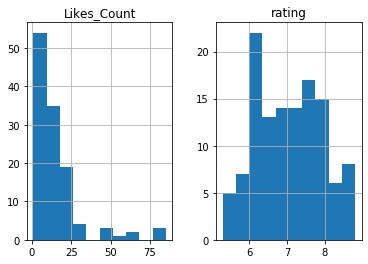

In [264]:
import matplotlib.pyplot as plt
viz = cdf[['rating','Likes_Count']]
viz.hist()
plt.show()

In [265]:
print(cdf.rating.count())
print(cdf.Likes_Count.count())

121
121


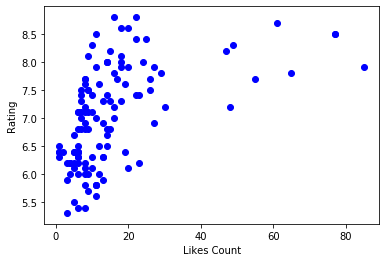

In [266]:
plt.scatter( cdf.Likes_Count,cdf.rating, color='blue')
plt.xlabel("Likes Count")
plt.ylabel("Rating")
plt.show()

### We can populate the missing ratings using linear regression

### Create Train and Test data

In [267]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train.shape)
print(test.shape)

(100, 2)
(21, 2)


#### Train data distribution

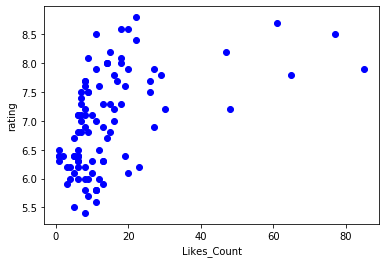

(100, 2)

In [268]:
plt.scatter(train.Likes_Count, train.rating,  color='blue')
plt.xlabel("Likes_Count")
plt.ylabel("rating")
plt.show()
train.shape

#### Modeling

In [269]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Likes_Count']])
train_y = np.asanyarray(train[['rating']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.02864176]]
Intercept:  [6.56484013]


Text(0, 0.5, 'Rating')

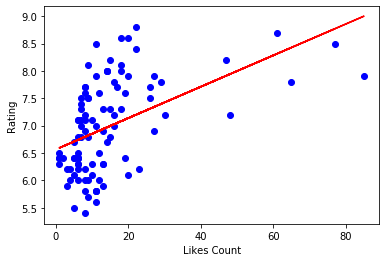

In [270]:
plt.scatter(train.Likes_Count, train.rating,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Likes Count")
plt.ylabel("Rating")

In [271]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Likes_Count']])
test_y = np.asanyarray(test[['rating']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.65
Residual sum of squares (MSE): 0.65
R2-score: -1.34


#### Lets remove outliers and see scores improves

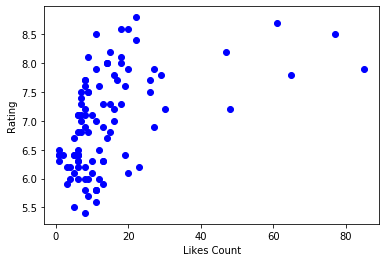

In [272]:
plt.scatter(train.Likes_Count, train.rating, color='blue')
plt.xlabel("Likes Count")
plt.ylabel("Rating")
plt.show()

In [273]:
print(train.shape)
filter_like_outlier = (train["Likes_Count"] > 40)
cdf_lik = train[filter_like_outlier]
print(cdf_lik)

#df2 = df2.append(cdf_zer, ignore_index=True)
train.drop(cdf_lik.index, inplace=True)

print(train.shape)
print(train)

(100, 2)
     rating  Likes_Count
69      8.7           61
101     8.5           77
116     7.9           85
157     7.8           65
170     8.2           47
230     7.2           48
(94, 2)
     rating  Likes_Count
2       6.8            6
3       7.7           26
4       6.0            6
5       7.9           20
10      6.4            1
..      ...          ...
245     6.8            7
250     5.6           11
251     8.0           14
258     6.4            6
263     8.2           15

[94 rows x 2 columns]


C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


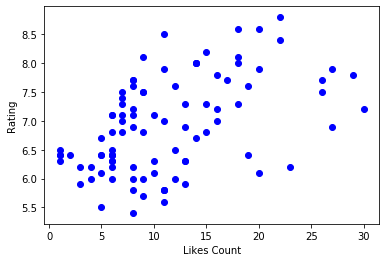

(94, 2)


In [274]:
plt.scatter(train.Likes_Count, train.rating, color='blue')
plt.xlabel("Likes Count")
plt.ylabel("Rating")
plt.show()
print(train.shape)

In [276]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Likes_Count']])
train_y = np.asanyarray(train[['rating']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.05970084]]
Intercept:  [6.23551072]


Text(0, 0.5, 'Rating')

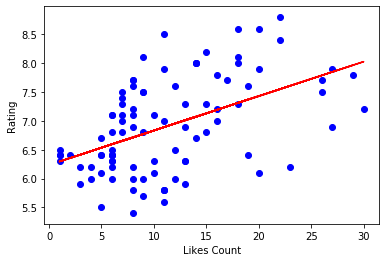

In [277]:
plt.scatter(train.Likes_Count, train.rating,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Likes Count")
plt.ylabel("Rating")

In [278]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Likes_Count']])
test_y = np.asanyarray(test[['rating']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.75
Residual sum of squares (MSE): 0.92
R2-score: 0.23


In [280]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_hat.flatten()})
df

,Actual,Predicted
0,8.3,6.832519
1,5.4,6.593716
2,8.0,7.668331
3,7.1,6.772818
4,7.4,6.832519
5,6.8,7.071322
6,7.9,7.310126
7,8.3,9.160852
8,7.4,7.548929
9,8.4,7.728032


In [281]:
print(cdf_zer)

     rating  Likes_Count
0       0.0            7
1       0.0            4
6       0.0            3
7       0.0            0
9       0.0            2
..      ...          ...
257     0.0            1
259     0.0            2
260     0.0            4
261     0.0            1
262     0.0            0

[144 rows x 2 columns]


In [283]:
from sklearn.metrics import r2_score

unkn_x = np.asanyarray(cdf_zer[['Likes_Count']])
unkn_y = np.asanyarray(cdf_zer[['rating']])
unkn_y_hat = regr.predict(unkn_x)

In [292]:
df = pd.DataFrame({'Actual': unkn_y.flatten(), 'Predicted': unkn_y_hat.flatten()})
df

,Actual,Predicted
0,0.0,6.653417
1,0.0,6.474314
2,0.0,6.414613
3,0.0,6.235511
4,0.0,6.354912
...,...,...
139,0.0,6.295212
140,0.0,6.354912
141,0.0,6.474314
142,0.0,6.295212


In [301]:
cdf_zer

,rating,Likes_Count
0,0.0,7
1,0.0,4
6,0.0,3
7,0.0,0
9,0.0,2
...,...,...
257,0.0,1
259,0.0,2
260,0.0,4
261,0.0,1


In [302]:
cdf_zer['rating'] = np.where(cdf_zer['rating'] == 0, unkn_y_hat.flatten(), cdf_zer['rating'])

C:\Users\kmohammad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
cdf_zer

,rating,Likes_Count
0,6.653417,7
1,6.474314,4
6,6.414613,3
7,6.235511,0
9,6.354912,2
...,...,...
257,6.295212,1
259,6.354912,2
260,6.474314,4
261,6.295212,1


In [335]:
ClusterData

,Unnamed: 0,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count.1
0,0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,NaN,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,NaN,2,NaN,NaN,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.8,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.7,9,NaN,NaN,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.0,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,NaN,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,NaN,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,NaN,2,2.0,Moderate,0,[],0
263,263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.2,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [418]:
df=ClusterData
s=cdf_zer
df.fillna(0,inplace=True)

mask = df["rating"] == 0
print(df.loc[mask, "rating"])
print('________')
print(s.loc[mask, "rating"])
df.loc[mask, "rating"]=s.loc[mask, "rating"]
df

0      0.0
1      0.0
6      0.0
7      0.0
9      0.0
      ... 
257    0.0
259    0.0
260    0.0
261    0.0
262    0.0
Name: rating, Length: 144, dtype: float64
________
0      6.653417
1      6.474314
6      6.414613
7      6.235511
9      6.354912
         ...   
257    6.295212
259    6.354912
260    6.474314
261    6.295212
262    6.235511
Name: rating, Length: 144, dtype: float64


,Unnamed: 0,index,name,categories,lat,lng,verified,dislike,rating,tipCount,tier,message,count,groups,count.1
0,0,0,コーヒヌール,Indian Restaurant,35.668740,139.651013,False,False,6.653417,5,2.0,Moderate,7,"[{'type': 'others', 'count': 7, 'items': [{'id...",0
1,1,0,CHAMI'S CURRY (チャミスカレー),Japanese Curry Restaurant,35.715756,139.672343,False,False,6.474314,2,0.0,0,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
2,2,0,Sitaara Diner (シターラ・ダイナー),Indian Restaurant,35.777623,139.721100,False,False,6.800000,2,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
3,3,0,Stone (ストーン),Yoshoku Restaurant,35.697209,139.785575,False,False,7.700000,9,0.0,0,26,"[{'type': 'others', 'count': 26, 'items': []}]",0
4,4,0,インド・ネパール料理 Raja 調布店,Indian Restaurant,35.653634,139.542344,False,False,6.000000,8,2.0,Moderate,6,"[{'type': 'others', 'count': 6, 'items': [{'id...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,0,ダルハラ,Indian Restaurant,35.674670,139.793944,False,False,6.474314,0,2.0,Moderate,4,"[{'type': 'others', 'count': 4, 'items': [{'id...",0
261,261,0,Deep Jyoti (ディープジョティ),Indian Restaurant,35.707202,139.666862,False,False,6.295212,0,2.0,Moderate,1,"[{'type': 'others', 'count': 1, 'items': [{'id...",0
262,262,0,華麗なるカレー 業平橋総本店,Indian Restaurant,35.711675,139.810153,False,False,6.235511,2,2.0,Moderate,0,[],0
263,263,0,牛たん処 い志井,Japanese Restaurant,35.653563,139.547401,False,False,8.200000,2,2.0,Moderate,15,"[{'type': 'others', 'count': 15, 'items': []}]",0


In [425]:
Tokyo_IndianRestaurantList=df[['name', 'lat', 'lng','rating','tipCount','tier','count']]
Tokyo_IndianRestaurantList

,name,lat,lng,rating,tipCount,tier,count
0,コーヒヌール,35.668740,139.651013,6.653417,5,2.0,7
1,CHAMI'S CURRY (チャミスカレー),35.715756,139.672343,6.474314,2,0.0,4
2,Sitaara Diner (シターラ・ダイナー),35.777623,139.721100,6.800000,2,2.0,6
3,Stone (ストーン),35.697209,139.785575,7.700000,9,0.0,26
4,インド・ネパール料理 Raja 調布店,35.653634,139.542344,6.000000,8,2.0,6
...,...,...,...,...,...,...,...
260,ダルハラ,35.674670,139.793944,6.474314,0,2.0,4
261,Deep Jyoti (ディープジョティ),35.707202,139.666862,6.295212,0,2.0,1
262,華麗なるカレー 業平橋総本店,35.711675,139.810153,6.235511,2,2.0,0
263,牛たん処 い志井,35.653563,139.547401,8.200000,2,2.0,15


## K-Mean Clustering

In [427]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

IndinaRestaurant_clustering = Tokyo_IndianRestaurantList.drop('name', 1)
IndinaRestaurant_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(IndinaRestaurant_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 1, 0, 1, 0, 2, 0, 2])

In [457]:
#add clustering labels
Tokyo_IndianRestaurant.insert(0, 'Cluster Labels', kmeans.labels_)
#Tokyo_IndianRestaurant.to_csv(r'C:\Users\kmohammad\Desktop\Kalesha\coursera\IBM\applied data science capstone\w3\project\tokyoclustering.csv')

In [455]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = Tokyo_IndianRestaurant.loc[54, 'lat'] # neighborhood latitude value
longitude = Tokyo_IndianRestaurant.loc[54, 'lng'] # neighborhood longitude value
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='black',
    popup=label,
    fill = True,
    fill_color = rainbow[cluster-1],
    fill_opacity = 0.7
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_IndianRestaurant['lat'], Tokyo_IndianRestaurant['lng'], Tokyo_IndianRestaurant['name'], Tokyo_IndianRestaurant['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
      
map_clusters

### Lets look at clusters

#### Cluster1

In [483]:
Cluster1=Tokyo_IndianRestaurant.loc[Tokyo_IndianRestaurant['Cluster Labels'] == 0, Tokyo_IndianRestaurant.columns[[1] + list(range(2, Tokyo_IndianRestaurant.shape[1]))]]
Cluster1

,name,lat,lng,rating,tipCount,tier,count
0,コーヒヌール,35.668740,139.651013,6.653417,5,2.0,7
4,インド・ネパール料理 Raja 調布店,35.653634,139.542344,6.000000,8,2.0,6
6,アーグラー 本店,35.709412,139.775147,6.414613,12,0.0,3
8,インドカリー RASA,35.668730,139.769537,8.300000,5,0.0,10
43,Sri Balaji,35.638164,139.704443,7.100000,4,2.0,9
...,...,...,...,...,...,...,...
251,チョウタリ,35.607031,139.620633,8.000000,3,0.0,14
253,ミルミレ 池袋店,35.730879,139.705379,6.713117,5,2.0,8
256,カレーショップ トップス TBS店,35.672853,139.736554,6.713117,3,0.0,8
263,牛たん処 い志井,35.653563,139.547401,8.200000,2,2.0,15


#### Cluster2

In [482]:
Cluster2=Tokyo_IndianRestaurant.loc[Tokyo_IndianRestaurant['Cluster Labels'] == 1, Tokyo_IndianRestaurant.columns[[1] + list(range(2, Tokyo_IndianRestaurant.shape[1]))]]
Cluster2

,name,lat,lng,rating,tipCount,tier,count
3,Stone (ストーン),35.697209,139.785575,7.700000,9,0.0,26
5,Shahi Dawat (シャヒ・ダワット),35.693708,139.763882,7.900000,9,2.0,20
15,ディップパレス 中目黒店,35.647735,139.694027,7.700000,8,2.0,17
21,Yakuzen Curry Jinenjo (薬膳カレー じねんじょ),35.726638,139.768338,6.400000,7,0.0,19
23,印度カレー 中栄,35.663747,139.770228,8.026536,15,0.0,30
26,Bondy (欧風カレー ボンディ),35.642513,139.748109,8.000000,7,0.0,24
29,スープカリィ厨房 ガネー舎,35.663317,139.757106,6.900000,11,0.0,27
32,SAPANA (SAPANA 水道橋店),35.701209,139.754112,7.200000,8,2.0,30
33,Nirvanam,35.670416,139.750780,7.500000,14,0.0,26
38,Salam Namaste (サラム ナマステ),35.697604,139.646101,8.400000,5,2.0,22


#### Cluster3

In [481]:
Cluster3=Tokyo_IndianRestaurant.loc[Tokyo_IndianRestaurant['Cluster Labels'] == 2, Tokyo_IndianRestaurant.columns[[1] + list(range(2, Tokyo_IndianRestaurant.shape[1]))]]
Cluster3

,name,lat,lng,rating,tipCount,tier,count
1,CHAMI'S CURRY (チャミスカレー),35.715756,139.672343,6.474314,2,0.0,4
2,Sitaara Diner (シターラ・ダイナー),35.777623,139.721100,6.800000,2,2.0,6
7,Tetulia Indian Restaurant / テトゥリア,35.714353,139.711016,6.235511,1,2.0,0
9,アジアンDining tika 茅場町店,35.677088,139.783234,6.354912,2,2.0,2
10,CoCo Ichibanya (CoCo壱番屋),35.729600,139.683079,6.400000,0,0.0,1
...,...,...,...,...,...,...,...
258,CoCo Ichibanya (CoCo壱番屋),35.665046,139.871698,6.400000,0,0.0,6
259,ガナパティ 東日本橋店,35.691752,139.784117,6.354912,4,2.0,2
260,ダルハラ,35.674670,139.793944,6.474314,0,2.0,4
261,Deep Jyoti (ディープジョティ),35.707202,139.666862,6.295212,0,2.0,1


#### Ckuster4

In [480]:
Cluster4=Tokyo_IndianRestaurant.loc[Tokyo_IndianRestaurant['Cluster Labels'] == 3, Tokyo_IndianRestaurant.columns[[1] + list(range(2, Tokyo_IndianRestaurant.shape[1]))]]
Cluster4

,name,lat,lng,rating,tipCount,tier,count
69,Bondy (欧風カレー ボンディ),35.693913,139.761713,8.700000,9,0.0,61
74,The KARI (ザ・カリ),35.662304,139.754750,8.300000,20,0.0,49
101,AJANTA,35.686161,139.736861,8.500000,35,2.0,77
116,Curry House Eleven Imasa (カレーハウス11イマサ),35.689883,139.698754,7.900000,29,1.0,85
132,ボンベイ 新宿店,35.688788,139.698022,9.160852,11,2.0,49
157,CoCo Ichibanya (CoCo壱番屋),35.698447,139.775764,7.800000,13,0.0,65
170,Delhi (デリー),35.665349,139.731003,8.200000,19,2.0,47
182,Curry Shop Alps (カレーショップ アルプス),35.681387,139.769615,7.700000,24,0.0,55
213,AJANTA,35.686161,139.736861,8.500000,35,2.0,77
230,MOTI 六本木店,35.662403,139.730608,7.200000,19,0.0,48


##### Cluster5

In [484]:
Cluster5=Tokyo_IndianRestaurant.loc[Tokyo_IndianRestaurant['Cluster Labels'] == 4, Tokyo_IndianRestaurant.columns[[1] + list(range(2, Tokyo_IndianRestaurant.shape[1]))]]
Cluster5

,name,lat,lng,rating,tipCount,tier,count
54,Annam Indian Restaurant (アナム),35.67009,139.764585,6.8,83,2.0,14


In [485]:
Cluster1.describe()

,lat,lng,rating,tipCount,tier,count
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.665373,139.706532,6.826973,5.971429,1.285714,9.514286
std,0.055543,0.076107,0.727551,2.812866,0.980134,3.183940
min,35.549179,139.542344,5.400000,1.000000,0.000000,3.000000
25%,35.635312,139.657696,6.300000,3.250000,0.000000,8.000000
50%,35.669329,139.710917,6.800000,6.000000,2.000000,9.000000
75%,35.700101,139.759346,7.300000,8.000000,2.000000,12.000000
max,35.860524,139.862495,8.500000,12.000000,3.000000,15.000000


In [501]:
Cluster2.describe()

,lat,lng,rating,tipCount,tier,count
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,35.662558,139.716164,7.676777,8.620690,1.103448,21.551724
std,0.046285,0.055020,0.709904,3.052093,1.012240,4.420619
min,35.534758,139.579043,6.100000,3.000000,0.000000,16.000000
25%,35.646141,139.691734,7.300000,6.000000,0.000000,18.000000
50%,35.670416,139.722919,7.800000,8.000000,2.000000,20.000000
75%,35.694385,139.757106,8.026536,11.000000,2.000000,25.000000
max,35.726638,139.785575,8.800000,15.000000,2.000000,30.000000


In [502]:
Cluster3.describe()

,lat,lng,rating,tipCount,tier,count
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,35.687886,139.710403,6.325983,1.741935,1.600000,2.012903
std,0.053802,0.079564,0.211469,1.610996,0.802593,1.920454
min,35.529574,139.477709,5.300000,0.000000,0.000000,0.000000
25%,35.659573,139.676774,6.235511,0.000000,2.000000,0.000000
50%,35.691069,139.713790,6.295212,1.000000,2.000000,2.000000
75%,35.715718,139.765384,6.414613,3.000000,2.000000,3.000000
max,35.834330,139.906104,7.400000,7.000000,2.000000,7.000000


In [503]:
Cluster4.describe()

,lat,lng,rating,tipCount,tier,count
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,35.681480,139.739395,8.196085,21.40000,0.900000,61.300000
std,0.013342,0.026861,0.564022,9.31188,0.994429,14.111067
min,35.662304,139.698022,7.200000,9.00000,0.000000,47.000000
25%,35.669359,139.730707,7.825000,14.50000,0.000000,49.000000
50%,35.686161,139.736861,8.250000,19.50000,0.500000,58.000000
75%,35.689609,139.759972,8.500000,27.75000,2.000000,74.000000
max,35.698447,139.775764,9.160852,35.00000,2.000000,85.000000


In [504]:
Cluster5.describe()

,lat,lng,rating,tipCount,tier,count
count,1.00000,1.000000,1.0,1.0,1.0,1.0
mean,35.67009,139.764585,6.8,83.0,2.0,14.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,35.67009,139.764585,6.8,83.0,2.0,14.0
25%,35.67009,139.764585,6.8,83.0,2.0,14.0
50%,35.67009,139.764585,6.8,83.0,2.0,14.0
75%,35.67009,139.764585,6.8,83.0,2.0,14.0
max,35.67009,139.764585,6.8,83.0,2.0,14.0


## From Above data Cluster4 seems to be good for business

### Lets Map it and visualize

In [499]:

#neighborhood_latitude = Cluster4.loc[69, 'lat'] # neighborhood latitude value
#neighborhood_longitude = Cluster4.loc[69, 'lng'] # neighborhood longitude value
#print(neighborhood_latitude)
neighborhood_latitude=35.68127564
neighborhood_longitude=139.766099


venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=13,reset=True) 


folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup=label,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(Cluster4.lat, Cluster4.lng, Cluster4.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    


venues_map


In [497]:
Cluster4

,name,lat,lng,rating,tipCount,tier,count
69,Bondy (欧風カレー ボンディ),35.693913,139.761713,8.700000,9,0.0,61
74,The KARI (ザ・カリ),35.662304,139.754750,8.300000,20,0.0,49
101,AJANTA,35.686161,139.736861,8.500000,35,2.0,77
116,Curry House Eleven Imasa (カレーハウス11イマサ),35.689883,139.698754,7.900000,29,1.0,85
132,ボンベイ 新宿店,35.688788,139.698022,9.160852,11,2.0,49
157,CoCo Ichibanya (CoCo壱番屋),35.698447,139.775764,7.800000,13,0.0,65
170,Delhi (デリー),35.665349,139.731003,8.200000,19,2.0,47
182,Curry Shop Alps (カレーショップ アルプス),35.681387,139.769615,7.700000,24,0.0,55
213,AJANTA,35.686161,139.736861,8.500000,35,2.0,77
230,MOTI 六本木店,35.662403,139.730608,7.200000,19,0.0,48
